In [1]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from tensorflow.keras.utils import plot_model
import tensorflow as tf

/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-08-26 13:59:45.891943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'cell_images/Train'
name_class = os.listdir(file_path)
name_class = name_class[1:3]
name_class

['Parasitized', 'Uninfected']

In [3]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [4]:
filepaths

['cell_images/Train/Parasitized/C118P79ThinF_IMG_20151002_105018_cell_150.png',
 'cell_images/Train/Parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png',
 'cell_images/Train/Parasitized/C91P52ThinF_IMG_20150821_123116_cell_189.png',
 'cell_images/Train/Parasitized/C84P45ThinF_IMG_20150818_101226_cell_98.png',
 'cell_images/Train/Parasitized/C144P105ThinF_IMG_20151015_163432_cell_310.png',
 'cell_images/Train/Parasitized/C136P97ThinF_IMG_20151005_141803_cell_131.png',
 'cell_images/Train/Parasitized/C65P26N_ThinF_IMG_20150818_154050_cell_177.png',
 'cell_images/Train/Parasitized/C60P21thinF_IMG_20150804_105034_cell_105.png',
 'cell_images/Train/Parasitized/C109P70ThinF_IMG_20150930_103811_cell_159.png',
 'cell_images/Train/Parasitized/C176P137NThinF_IMG_20151201_122708_cell_126.png',
 'cell_images/Train/Parasitized/C136P97ThinF_IMG_20151005_142437_cell_119.png',
 'cell_images/Train/Parasitized/C173P134NThinF_IMG_20151130_115733_cell_227.png',
 'cell_images/Train/Parasitized/C85P46

In [5]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasi

In [6]:
filepath = pd.Series(filepaths,name= 'Filepath').astype(str)
labels = pd.Series(labels,name='Label')
data = pd.concat([filepath,labels],axis = 1)
data = data.sample(frac= 1).reset_index(drop=True)
data.head(10)

,Filepath,Label
0,cell_images/Train/Uninfected/C12NThinF_IMG_201...,Uninfected
1,cell_images/Train/Uninfected/C225ThinF_IMG_201...,Uninfected
2,cell_images/Train/Uninfected/C138P99ThinF_IMG_...,Uninfected
3,cell_images/Train/Uninfected/C122P83ThinF_IMG_...,Uninfected
4,cell_images/Train/Uninfected/C150P111ThinF_IMG...,Uninfected
5,cell_images/Train/Parasitized/C116P77ThinF_IMG...,Parasitized
6,cell_images/Train/Parasitized/C173P134NThinF_I...,Parasitized
7,cell_images/Train/Parasitized/C48P9thinF_IMG_2...,Parasitized
8,cell_images/Train/Uninfected/C210ThinF_IMG_201...,Uninfected
9,cell_images/Train/Uninfected/C67P28N_ThinF_IMG...,Uninfected


In [7]:
data.Label.value_counts()

Uninfected     13780
Parasitized    13780
Name: Label, dtype: int64

In [8]:
train,test = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
train

,Filepath,Label
13246,cell_images/Train/Parasitized/C180P141NThinF_I...,Parasitized
3381,cell_images/Train/Parasitized/C116P77ThinF_IMG...,Parasitized
16177,cell_images/Train/Uninfected/C235ThinF_IMG_201...,Uninfected
15718,cell_images/Train/Parasitized/C99P60ThinF_IMG_...,Parasitized
22678,cell_images/Train/Parasitized/C70P31_ThinF_IMG...,Parasitized
...,...,...
21575,cell_images/Train/Parasitized/C156P117ThinF_IM...,Parasitized
5390,cell_images/Train/Uninfected/C161P122ThinF_IMG...,Uninfected
860,cell_images/Train/Uninfected/C98P59ThinF_IMG_2...,Uninfected
15795,cell_images/Train/Parasitized/C180P141NThinF_I...,Parasitized


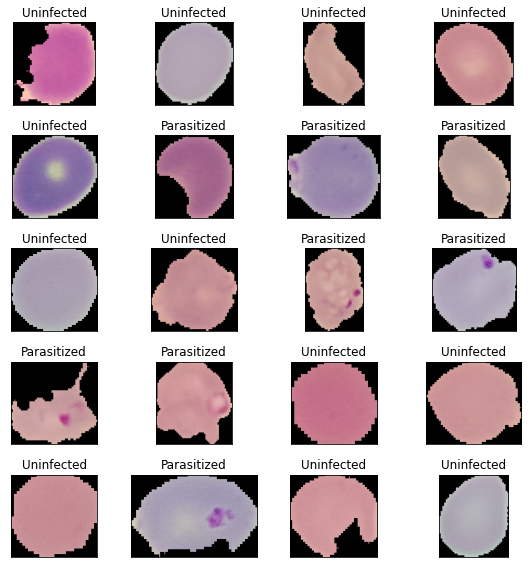

In [10]:
fig, axes = plt.subplots(nrows=5,ncols=4,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for temp, axises in enumerate(axes.flat):
    axises.imshow(plt.imread(data.Filepath[temp]))
    axises.set_title(data.Label[temp])
plt.tight_layout()
plt.show()


In [11]:
train_dat_genenerator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
test_dat_genenerator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_generator = train_dat_genenerator.flow_from_dataframe(
dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_generator= train_dat_genenerator.flow_from_dataframe(
dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_generator= test_dat_genenerator.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 22047 validated image filenames belonging to 2 classes.


/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


Found 5511 validated image filenames belonging to 2 classes.
Found 5511 validated image filenames belonging to 2 classes.


/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [22]:
import tensorflow as tf
pre_train_model = tf.keras.applications.mobilenet.MobileNet(
    input_shape = (100,100,3), alpha = 1.0, depth_multiplier=1,dropout=0.01,
    include_top=False,weights='imagenet',input_tensor=None,pooling='max',
    classes =1000,classifier_activation='softmax')
pre_train_model.trainable = False

/var/folders/9c/6s7ws9p94f3bzxnhj5zm5fz00000gn/T/ipykernel_62967/1404416.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_train_model = tf.keras.applications.mobilenet.MobileNet(


In [24]:
inputs_model = pre_train_model.input
x = Dense(128,activation='relu')(pre_train_model.output)
x= Dense(128,activation = 'relu')(x)
outputs = Dense(2,activation='softmax')(x)
model=Model(inputs=inputs_model,outputs=outputs)


In [25]:
model.compile(
optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [27]:
history = model.fit(
train_generator,
validation_data=valid_generator,epochs=30,callbacks=my_callbacks)

Epoch 1/30


/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


689/689 ━━━━━━━━━━━━━━━━━━━━ 161s 226ms/step - accuracy: 0.8009 - loss: 0.4463 - val_accuracy: 0.8782 - val_loss: 0.2902
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 189ms/step - accuracy: 0.8759 - loss: 0.2898 - val_accuracy: 0.8737 - val_loss: 0.2889
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 146s 211ms/step - accuracy: 0.8782 - loss: 0.2812 - val_accuracy: 0.8728 - val_loss: 0.2927


In [28]:
model.save('model_working_mobilenet.h5')

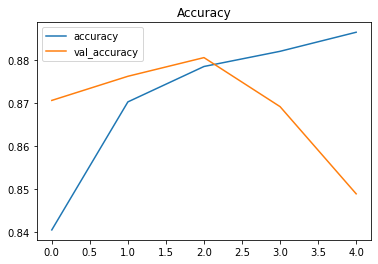

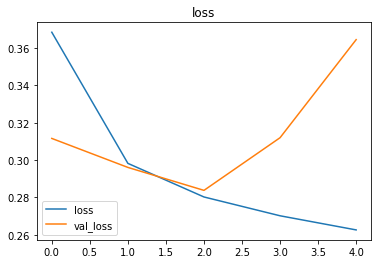

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.show()
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.show()

In [ ]:
results = model.evaluate(test_generator,verbose=0)
print("    Test Loss: {:5f}".format(results[0]))
print('Test Accuracy: {:2f}%'.format(results[1]*100))

/Users/mobyfashanu/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 0.364543
Test Accuracy: 84.884775%


In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
labels = (train_generator.class_indices)

labels =dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 168ms/step


In [ ]:
y_test =list(test.Label)
print(classification_report(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [5512, 5511]

In [ ]:
print(confusion_matrix(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [5512, 5511]

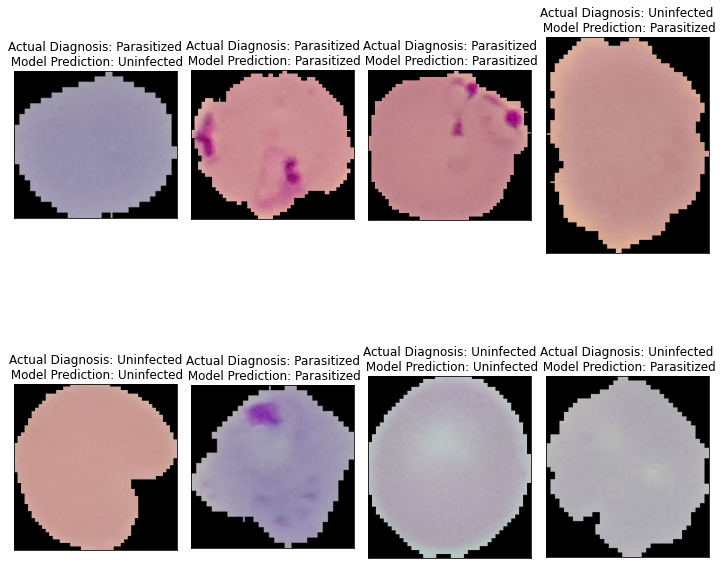

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})                       
for temp, axises in enumerate(axes.flat):
    axises.imshow(plt.imread(test.Filepath.iloc[temp]))
    axises.set_title(f"Actual Diagnosis: {test.Label.iloc[temp]}\n Model Prediction: {pred[temp]}")
plt.tight_layout()
plt.show()

In [ ]:
pip install pydot


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


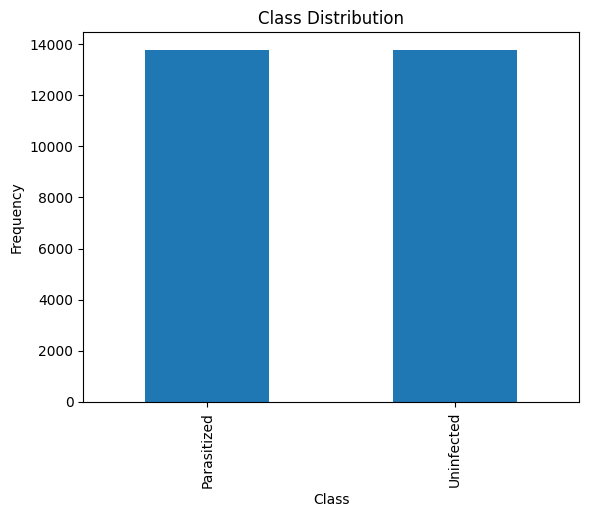

In [ ]:
data['Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [ ]:
sensitivity = recall_score(y_test, pred, average='macro')
specificity = specificity_score(y_test, pred, average='macro')

metrics_df = pd.DataFrame({
    'Metric': ['Sensitivity', 'Specificity'],
    'Score': [sensitivity, specificity]
})
metrics_df.plot(kind='bar', x='Metric', y='Score', legend=False)
plt.title('Sensitivity and Specificity')
plt.ylim(0, 1)
plt.show()


NameError: name 'recall_score' is not defined

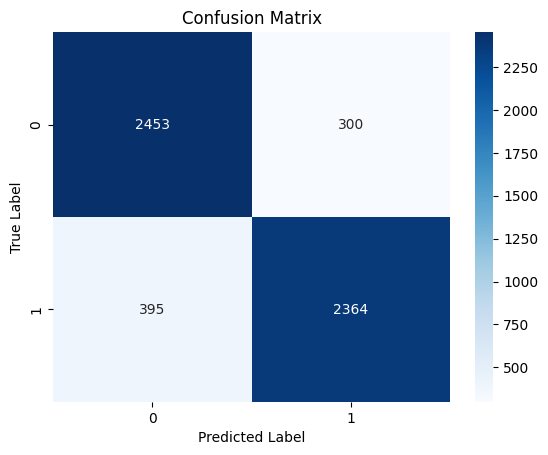

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


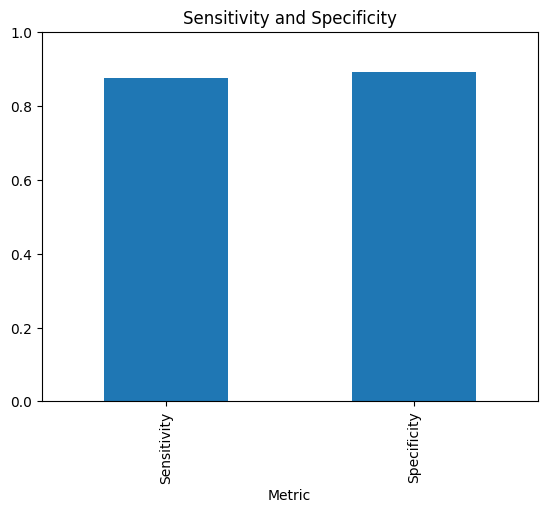

In [ ]:
sensitivity = recall_score(y_test, pred, average='macro')

# Compute Specificity
# Specificity = TN / (TN + FP)
cm = confusion_matrix(y_test, pred)
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
specificity = tn / (tn + fp)

metrics_df = pd.DataFrame({
    'Metric': ['Sensitivity', 'Specificity'],
    'Score': [sensitivity, specificity]
})

metrics_df.plot(kind='bar', x='Metric', y='Score', legend=False)
plt.title('Sensitivity and Specificity')
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=list(labels.values()))
pred_bin = label_binarize(pred, classes=list(labels.values()))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {list(labels.values())[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

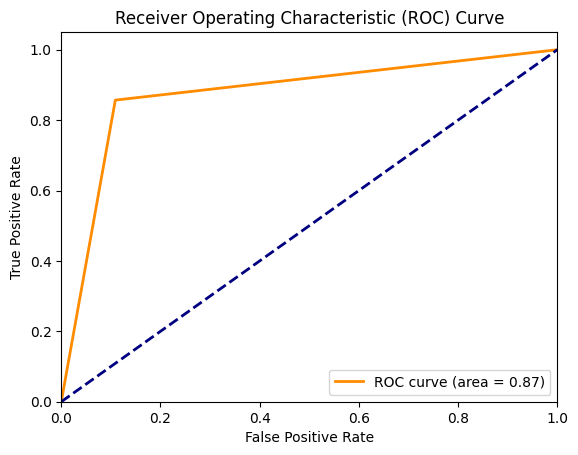

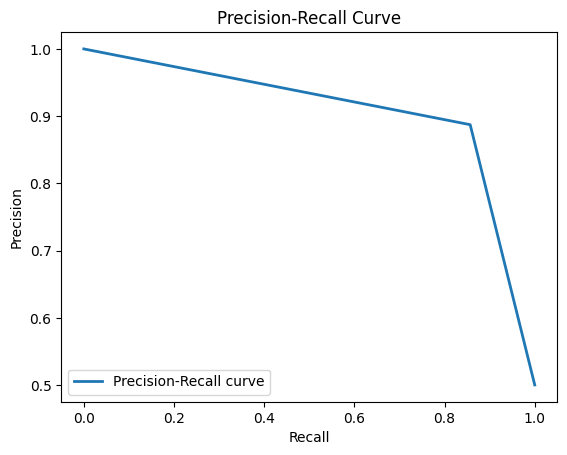

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Encode y_test and pred as binary (0 and 1)
y_test_bin = [0 if label == list(labels.values())[0] else 1 for label in y_test]
pred_bin = [0 if label == list(labels.values())[0] else 1 for label in pred]

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin, pred_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bin, pred_bin)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
